<a href="https://colab.research.google.com/github/virb30/classificador-fake-news/blob/main/Projeto_DSNP_3_0_Classificador_de_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Classificador de Fake News


Vivemos na era digital, onde a informação está mais acessível do que nunca, e continua ficando cada vez mais acessível, de forma mais ágil e ampla.

Apesar dos benefícios que isso traz, também existem problemas e riscos com isso. Aqui, vamos nos preocupar com um dos maiores deles: ***Fake News***
<p align=center>
  <img src="https://image.freepik.com/free-photo/woman-reading-newspaper_53876-13446.jpg" height="30%">
</p>

Com certeza você já se deparou com uma dessas. Em uma era de informação, a desinformação acaba sendo o nosso maior problema.

Em suma, ***Fake News*** são, como a tradução literal sugere, Notícias Falsas. Elas podem ir desde um número diferente em uma estatística apresentada, até a notícia de uma acontecimento completamente falso.



## Como isso influencia nossa vida?

Como de costume, nós tendemos a acreditar nos grandes veículos de mídia, ou de pessoas do nosso ciclo de amigos que nos encaminham notícias em redes sociais. Dessa forma, criamos o hábito de não checar nossas fontes, e assim, acreditamos e disseminamos notícias falsas, às vezes sem nem saber.

Isso se torna um grande problema quando afeta o resultado de algo importante no bem comum de nossa sociedade, como resultados de eleições, opinião pública sobre determinados projetos, políticas públicas, e até pessoas públicas, sejam elas do meio político, artístico, jornalístico, ou qualquer outro.

## O Projeto

Hoje em dia, podemos contar com ferramentas que nos ajudem a identificar e filtrar notícias falsas. Com técnicas de *Machine Learning* como **Redes Neurais** essa tarefa de vasculhar diversas fontes de notícias para descobrir o que é falso e o que é factual fica mais fácil.

> O objetivo do projeto é treinar um modelo que seja capaz de classificar notícias, com a melhor acurácia possível, entre falsas ou factuais.

Para isso, usaremos a biblioteca ***Tensorflow*** para treinar Redes Neurais que façam esse trabalho por nós.

Utilizaremos o FakeRecogna dataset, um projeto brasileiro que compila uma série de notícias reais e fakes disponível em: https://github.com/Gabriel-Lino-Garcia/FakeRecogna

In [19]:
# importando os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# configurando o noteebook
np.random.seed(42)
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [20]:
# carregando e verificando os dados
DATASET = 'https://github.com/Gabriel-Lino-Garcia/FakeRecogna/raw/master/dataset/FakeRecogna.xlsx'
df = pd.read_excel(DATASET)

print(df.shape)
df.head()

(11903, 8)


,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nPapa Francisco foi preso sob acusação de t...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagão vaticano papar presar acusação tráfico ...,entretenimento,11/01/2021,\nEdgard Matsuki,https://www.boatos.org/religiao/papa-francisco...,0.0
1,Equador prepara cova coletiva para mortos por ...,NaN,o governar equador anunciar preparar cova cole...,saúde,27/03/2020 18h25,27/03/2020 18h25,https://noticias.uol.com.br/internacional/ulti...,1.0
2,Air France voltará a operar voo direto Pequim-...,NaN,o companhia air france operar voar direto pequ...,saúde,07/08/2020 13h42,07/08/2020 13h42,https://www.uol.com.br/nossa/noticias/afp/2020...,1.0
3,Marfrig intensifica venda de carne do Brasil a...,NaN,o marfrig global foods retomar vender carnar b...,saúde,27/04/2020 14h53,27/04/2020 14h53,https://economia.uol.com.br/noticias/reuters/2...,1.0
4,As parciais das eleições de 2014 alternaram ma...,NaN,o assunto voltar o compartilhar rede social ju...,entretenimento,31/07/2021,Gilmar Lopes,https://www.e-farsas.com/as-parciais-das-eleic...,0.0


### Os Dados
Segundo a documentação, nosso conjunto de dados possui quase 12 mil linhas e 8 colunas, das quais temos:

* `Titulo` - Título da notícia
* `Subtitulo` - Subtítulo da notícia
* `Noticia` - Texto da notícia
* `Categoria` - Categoria da notícia
* `Data` - Data em que foi publicada
* `Autor` - Autor da notícia
* `URL` - Site da notícia
* `Classe` que é nossa variável alvo e está dividida em:
  * 0 - Notícia Fake
  * 1 - Notícia Real


As categorias das notícias estão dividias em:
* Brazil
* Entertainment
* Health
* Politics
* Science
* World

Dessas categorias as que mais aparecem são `Health`e `Politics`.

### Tratando os Dados

Aqui, estamos lidando com nossa linguagem natural em formato de `string`, então precisamos de alguns conhecimentos de NLP para tratar esses dados da melhor forma, para que possam ser passados ao nosso modelo com sucesso, e dessa forma, obtermos os resultados que desejamos.

In [21]:
# tratando do texto das notícias
import string
def clean_text(text):
    words = str(text).lower()
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df['Noticia'] = df['Noticia'].apply(clean_text)
df.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nPapa Francisco foi preso sob acusação de t...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagão vaticano papar presar acusação tráfico ...,entretenimento,11/01/2021,\nEdgard Matsuki,https://www.boatos.org/religiao/papa-francisco...,0.0
1,Equador prepara cova coletiva para mortos por ...,NaN,o governar equador anunciar preparar cova cole...,saúde,27/03/2020 18h25,27/03/2020 18h25,https://noticias.uol.com.br/internacional/ulti...,1.0
2,Air France voltará a operar voo direto Pequim-...,NaN,o companhia air france operar voar direto pequ...,saúde,07/08/2020 13h42,07/08/2020 13h42,https://www.uol.com.br/nossa/noticias/afp/2020...,1.0
3,Marfrig intensifica venda de carne do Brasil a...,NaN,o marfrig global foods retomar vender carnar b...,saúde,27/04/2020 14h53,27/04/2020 14h53,https://economia.uol.com.br/noticias/reuters/2...,1.0
4,As parciais das eleições de 2014 alternaram ma...,NaN,o assunto voltar o compartilhar rede social ju...,entretenimento,31/07/2021,Gilmar Lopes,https://www.e-farsas.com/as-parciais-das-eleic...,0.0


Analisando nossos dados ausentes temos algumas informações interessantes:
1. existe apenas um registro que não possui classe, portanto vamos removê-lo.
1. existem 6323 registros sem subtítulo que deveremos tratar para que não cause problemas com o modelo.

In [22]:
df.isnull().sum()

Titulo         31
Subtitulo    6323
Noticia         0
Categoria       1
Data          352
Autor          17
URL             1
Classe          1
dtype: int64

In [23]:
# exclui linhas cuja classe é null
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['Classe'])

# verifica os valores nulos
df_clean.isnull().sum()

Titulo         30
Subtitulo    6322
Noticia         0
Categoria       0
Data          351
Autor          16
URL             0
Classe          0
dtype: int64

Por fim vamos substituir os valores `NaN` por `''`

In [25]:
df_clean = df_clean.fillna(value='')
df_clean.isnull().sum()

Titulo       0
Subtitulo    0
Noticia      0
Categoria    0
Data         0
Autor        0
URL          0
Classe       0
dtype: int64

Agora, o que precisamos é separar nossos dados em treino, validação e teste, para que possamos continuar a trilhar o caminho que nos leva ao modelo.

In [27]:
# separando os datasets em treino, validação e teste
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_clean)
train, validation = train_test_split(train, test_size = 0.2)
print('Entradas por Dataset')
print('Dataset de Treino: ',len(train), 'linhas.')
print('Dataset de Validação: ', len(validation), 'linhas.')
print('Dataset de Teste: ', len(test), 'linhas.')

Entradas por Dataset
Dataset de Treino:  7140 linhas.
Dataset de Validação:  1786 linhas.
Dataset de Teste:  2976 linhas.


### Pré-Processamento de Strings - NLP

Aqui neste projeto estamos focando em ***Deep Learning*** e a implementação de **Redes Neurais**, por isso, não iremos nos extender em pré-processamento de Strings.

De qualquer forma, esse é um ponto importante do projeto. Aqui, basicamente o que queremos é simplificar o texto, para que seja mais fácil do nosso modelo processar e entender. Por isso, iremos utilizar uma técnica que se chama ***Tokenizing***.

Em suma, Tokenizing, ou Tokenização, em tradução livre, é um passo que separa longos textos de strings em pedaços de textos mais curtos, chamados de tokens.

<p align=center>
  <img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" height="30%">
</p>

Para ler mais sobre esse assunto e entender melhor os passos e parâmetros abaixo, deixarei links de referência [aqui](https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html) e [aqui](https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html).

In [31]:
# preparando os dados para o modelo
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train['Noticia'])
word_index = tokenizer.word_index

# aplicando técnicas tokenizing e padding
training_sequences = tokenizer.texts_to_sequences(np.array(train['Noticia']))
training_padded = pad_sequences(training_sequences,truncating=trunc_type, padding=pad_type)

max_length = len(training_padded[0])

validation_sequences = tokenizer.texts_to_sequences(np.array(validation['Noticia']))
validation_padded = pad_sequences(validation_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

# criando arrays com inputs
x_train = np.copy(training_padded)
x_val = np.copy(validation_padded)
y_train = train['Classe'].values
y_val = validation['Classe'].values

In [32]:
# veriificando o tamanho dos arrays
print('Tamanho dos Arrays')
print('Treino: ', len(x_train), 'linhas.')
print('Resposta: ', len(y_train), 'linhas.')

Tamanho dos Arrays
Treino:  7140 linhas.
Resposta:  7140 linhas.


### Preparando, Instanciando e Treinando o Modelo

Agora que nossos dados estão prontos, é hora de ir ao que interessa.

Foi feito um RandomSearch para encontrar os melhores parâmetros, em um processo lento e externo a este notebook, e instanciado um modelo que usa os melhores parâmetros encontrados.

In [35]:
# instanciando e dando fit no modelo
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, (155), input_length=max_length),
        tf.keras.layers.Conv1D(16, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

model.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), 
                      metrics=['accuracy'])
history = model.fit(x_train, y_train, verbose = 2, epochs = 5, validation_data = (x_val, y_val),
                   callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=6)])

Epoch 1/5
224/224 - 5s - loss: 0.4096 - accuracy: 0.8279 - val_loss: 0.2025 - val_accuracy: 0.9183 - 5s/epoch - 21ms/step
Epoch 2/5
224/224 - 2s - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1616 - val_accuracy: 0.9356 - 2s/epoch - 9ms/step
Epoch 3/5
224/224 - 2s - loss: 0.0594 - accuracy: 0.9829 - val_loss: 0.1619 - val_accuracy: 0.9406 - 2s/epoch - 9ms/step
Epoch 4/5
224/224 - 3s - loss: 0.0238 - accuracy: 0.9959 - val_loss: 0.1787 - val_accuracy: 0.9362 - 3s/epoch - 11ms/step
Epoch 5/5
224/224 - 2s - loss: 0.0112 - accuracy: 0.9982 - val_loss: 0.1913 - val_accuracy: 0.9384 - 2s/epoch - 9ms/step



Os resultados são bem promissores, apesar de carecerem de uma maior investigação. No entanto, cumpriu o objetivo de demonstrar o poder das Redes Neurais.

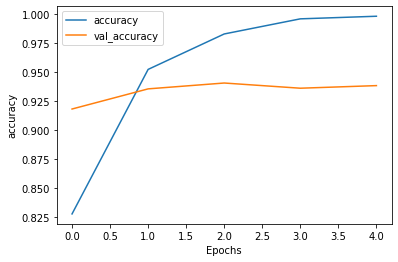

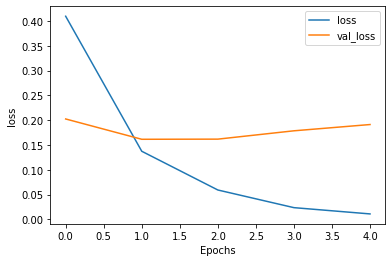

In [36]:
# visualizando os resultados
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Fazendo Previsões no Conjunto de Teste

Por fim, temos o pipeline ideal para tratar nossos dados, já treinamos, tunamos e obtivemos excelentes resultados em nosso conjunto de validação. Nosso modelo está pronto, mas ele tem mais uma missão a cumprir. 

Vamos apresentar dados completamente novos a ele, fazer previsõs e ver como ele se sai.

In [37]:
# tratando os dados de teste
test_sequences = tokenizer.texts_to_sequences(np.array(test['Noticia']))
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen = max_length)

In [38]:
# fazendo previsões
preds = np.round(model.predict(test_padded))

In [39]:
# conferindo o tamanho do resultado
len(preds)

2976

In [41]:
# verificando a acurácia
acc = np.sum(1 if i==j else 0 for i,j in zip(preds, test["Classe"].values)) / len(test)
print("Accuracy: ", acc )

Accuracy:  0.9220430107526881


## Conclusão

Nesse projeto utilizamos um *dataset* relativamente pequeno dada a dificuldade de encontrar conjuntos de dados para esse tipo de problema no cenário nacional. Mesmo assim conseguimos obter resultados promissores com nosso modelo, mesmo quando apresentamos dados desconhecidos pelo modelo, obtivemos uma acurácia de 92%.